# Project for Machine Learning and Statistics - December 2021


## Submitted by Sinéad Duffy, ID 10016151

***

### Notebook 1

#### Problem Statement - write an overview of the scikit-learn library, and outline (using examples) 3 algorithms of that package

***


### Introduction

Scikit-learn is a library within Python that allows for machine learning scenarios to be completed using regression / classifification as well as clustering.[^1] [^2] The library draws on other packages / libraries such as NumPy, Matplotlib, Pandas etc in to improve functionality.[^3]  
<br>
The scikit-learn library allows developers to use supervised and unsupervised learning algorithms to test data that is loaded using a .csv file (in the case of this noteook).  Within supervised learning 17 distinct areas are outlined, such as linear models, kernel ridge regression, stochastic gradient descent, nearest neighbours and decision tress.[^1]        Unsupervisied learning has 9 distinct areas such as Gaussian mixture models, manifold learning, clustering and biclustering.[^1]
<br><br>
As outlined above, the brief of this notebook is to outline 3 of the algorithms of the scikit-learn library, using examples.  For that reason, the notebook will be segmented into;<br>

1. Introduction
2. Algorithn 1 - Logistic Regression
3. Algorithn 2 - Naive Bayes (Gaussian Function)
4. Algorithm 3
5. Conclusion
6. References

<br>
The refrences used throughout the notebook are outlined in section 5. Throughout the notebook footnotes are used to indicate where the specific refrences are used.
<br><br>
The notebook also contains a number of cells containing code. Each of these are outlined in subsequent sections.
<br>
<br>
The choosen algorithms for this package are;
<br><br>

### Introduction to Machine Learning with scikit-learn

https://scikit-learn.org/stable/tutorial/basic/tutorial.html

In [1]:
# importing libraries

# data processing libraries
import numpy as np
import csv
import pandas as pd

# libraries to plot results
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("dark")
sns.set_theme(style="ticks")

# sklearn libraries to complete the analysis
import sklearn as sk
import sklearn.linear_model as lm
import sklearn.neighbors as nei
import sklearn.model_selection as mod

# models for logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


### The Heart Disease Data Set.

As outline above, the choosen dataset consists of 303 rows and 14 distict attributes.  The original dataset had 76 distinct attributes.  For the purpose of this notebook, the dataset has been consolidated to 14 distinct attributes.

Each of the attributes can be as [5] 

- Age: the age of the patient.
- Sex: displays the gender of the patient, shown as either 1 = male  or 0 = female
- Chest-pain type: displays the type of chest-pain experienced by the patient shown as 1 = typical angina / 2 = atypical angina / 3 = non — anginal pain / 4 = asymptotic
- Resting Blood Pressure: displays the resting blood pressure value of the patient in units of mmHg
- Serum Cholestrol: displays the serum cholesterol in units of mg/dl
- Fasting Blood Sugar: compares the fasting blood sugar value of the patient with 120mg/dl. Fasting been shown as blood sugar less than 120mg/dl is 1 (true)  ....   else : 0 (false)
- Resting ECG : shows the resting electrocardiographic results of 0 = normal / 1 = having ST-T wave abnormality / 2 = left ventricular hyperthrophy
- Max heart rate achieved : shows the max heart rate of the patiend.
- Exercise induced angina is shown by either a 1 = yes  or  0 = no
- ST depression induced by exercise relative to rest: is shown by a value which is an integer or float.
- Peak exercise ST segment : is shown as either 1 = upsloping / 2 = flat / 3 = downsloping
- Number of major vessels (0–3) colored by flourosopy
- Thal : shows the thalassemia of the patient and it is either 3 = normal / 6 = fixed defect / 7 = reversible defect
- Num : shows if the patient has heart disease or not and the values are either 0 = absence / 1, 2, 3, 4 = present



In [2]:
#importing a csv file using pandas
df = pd.read_csv('Datasets\heart.csv')

#print the summary data of the datafile
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       303 non-null    int64  
 1   Sex       303 non-null    int64  
 2   CP        303 non-null    int64  
 3   Trestbps  303 non-null    int64  
 4   Chol      303 non-null    int64  
 5   FBS       303 non-null    int64  
 6   RestECG   303 non-null    int64  
 7   Thalach   303 non-null    int64  
 8   Exang     303 non-null    int64  
 9   OldPeak   303 non-null    float64
 10  Slope     303 non-null    int64  
 11  CA        303 non-null    int64  
 12  Thal      303 non-null    int64  
 13  Num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [3]:
# convert float 64 to int64 type to allow processing to take place
df['OldPeak'] = df['OldPeak'].astype(np.int64)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       303 non-null    int64
 1   Sex       303 non-null    int64
 2   CP        303 non-null    int64
 3   Trestbps  303 non-null    int64
 4   Chol      303 non-null    int64
 5   FBS       303 non-null    int64
 6   RestECG   303 non-null    int64
 7   Thalach   303 non-null    int64
 8   Exang     303 non-null    int64
 9   OldPeak   303 non-null    int64
 10  Slope     303 non-null    int64
 11  CA        303 non-null    int64
 12  Thal      303 non-null    int64
 13  Num       303 non-null    int64
dtypes: int64(14)
memory usage: 33.3 KB
None


In [ ]:
# print the dataframe and show the types of data that it contains
print(df)

## What the analysis should look for 

Once the data has been loaded into the notebook, it's important to confirm what analysis will be completed.  As outined above, the data set is looking at whither a patient has been found to have heart diease or not.
<br><br>
The column that tracks this result is the 'num' column.  A outlined above, a zero (0) result says no heart diease has been found, any other result (1 to 4) show that it has been found.

The following sections outline the preparation of the data for analysis, as well as the different analysis that is carried out by the author.


## Exploring the imported dataset

In [ ]:
# describe the main stat's output of the data frame
df.describe()

In [ ]:
# by using the group by function, it is possible to see how the data is grouped, based on the 'Num' column
x = df.groupby("Num")
x

In [ ]:
# displays the averages of each column against the results within the 'Num' column.

x.mean()

The dataset allows a programmer to determine if the patient has heart diease or not.  The column 'num' displays the result of the analysis.  Any result in num, other than zero (0), indicates that the patient has heart diease.  A zero (0) result indicates that heart diease is not present.
<br><br>
The num column currently has values of 0 to 4 recorded.  In order to store a true / false result, the author can use the map() function in pandas to assign a different value for the duration of the program.  The values stored in the dataframe are not altered.
<br><br>
In this instance, the value of 1 is assinged to values 1 / 2 / 3 / 4 that are stored in the num column of the data frame.  Thus, giving a true / false value to the column.
<br><br>
For ease of reference, the same method is used on the 'sex' column to give a male or female value rather than the existing numerical one.  As a reminder, the gender of the patient, shown as either 1 = male  or 0 = female.

In [4]:
# using pandas to map the values of the 'Num' column to either true (represented by a 1) or false (represented by a 0)
df['Num'] = df.Num.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# confirm that the column Num is still an integer
df['Num']

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: Num, Length: 303, dtype: int64

In [5]:
x2= df.groupby("Num")
x2

In [ ]:
x2.mean()

In [ ]:
#plot all the variables against each other to see what the data looks like.
sns.pairplot(df, hue="Num")

The pair plot above helps to show all the variables, and to see if any relationships or correlations exist between them.  The data in the pair plot plotted against the variable (hue) Num.  As described above, if the value of Num is 0, then no heart diease is found in the patient.  A value of 1 outlines that heart diease is present in the patient.
<br><br>
Visualising the data using Seaborn's pairplot, helps to show that relationships / correlations exist between several of the variables.  For example, OldPeak shows correlations with Age / Testbps / Chol and Thalach.  The correlations are both positive as in OldPeak with Chol, Testbps and Thalach, as well as neutral in the case of OldPeak and Age.
<br><br>
Using a correlation heatplot (below) it is possible to show relationship or features between two values,$^9$, $^10$. To display a correlation, Panda uses the function $data.corr()$.

There are three different models of correlations that can be used by Pandas. They are;

- Pearson's r - maps the linear relationsship between two variables.$^11$
- Spearman's rho - maps the rank of variables.$^12$
- Kendall's tau - maps the rank of variables against their position in the data, i.e first / second etc.$^13$

The cell below below outlines the correlation of the dataset. 'Age' is the variable that has been used for the correlation, and is compared against each of the other variables.  The Table below outlines what a negative and positve correlation results in$^10$.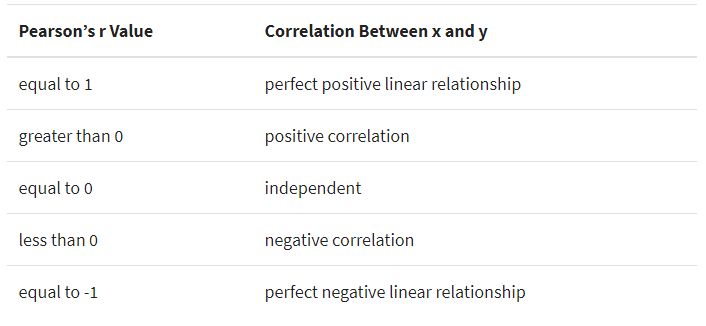

In [ ]:
# correlation Mapping

correlation = df.corr()
# display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

### Classification Problem

As stated previously, the purpose of this notebook is to look at the data, and see if it is possible to predict if heart diesase is present in a given patient.  
<br>
The last column in the dataset (Num) outlines the if heart diesease is present or not.  The Author has used the $ map()$ to easily identify if this is true ($1$) or false ($0$) no heart diease found in the patient.  The following sections will outline how classification is completed for the heart diease dataset.

#### Classification defined
Classification is part of the Supverised Learning approach to machine learning [6 / 7 / 8]. IBM defines Supervised Learning as an "approach that’s defined by its use of labeled datasets".[8]  This basically means that the data to be analyzed has already had labels applied to it.  Classification is part of this type of machine learning and uses the data labels to 'learn' about the data, and use this to 'predict' results from data that is similar, but not yet labeled [6 / 7 / 8].
<br><br>
Scikit-learn's supervised learning section has many models that can be used to classify data including [6 / 7 / 8]; 

- K-Nearest Neighbors
- Support Vector Machines
- Decision Tree Classifiers / Random Forests
- Naive Bayes
- Linear Discriminant Analysis
- Logistic Regression
<br><br>
The chosen supervised learning algorithms for this notebook are outlined in detail in the following sections.

### 1. Logistic Regression

Linear Regression test to make sure that the predition is working
<br>

#### use this website reference ... 
https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/
<br>

#### Creating testing and training data

Using the <b>sklearn.model_selection.train_test_split</b> function, the dataset is divided into two distinct sub data frames - Test and Train.  
<br><br>
The dataset (df) is divided 80 / 20, with 80% of the data being assigned to the training dataset, with the remaining dataset being assigned to the test one using the <b>test_size paramater</b>.  It possible for the split to be placed on the training data using a similar parameter of <b>train_size</b>.
<br><br>
The parameter of <b>random_state</b> controls the amount of shuffling that is applied to the data before the split occurs.  The input is either a number (i.e. the number of shuffles) or none (i.e. no shuffling takes place)



In [30]:
# # assign values for x and y from the start to the end of the df
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# spliting the dataframe into Test and Train data
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [7]:
# creating a new classifer using logistic regression
logreg_clf = LogisticRegression()

In [8]:
# training the classifier
logreg_clf.fit(X_Train, y_Train)

C:\Users\sinea\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
# Predicting the result based on the test data
y_pred = logreg_clf.predict(X_Test)


### Confusion Matrix

Sciki-learn has an inbuild functionality to allow a progrm to test the accuracy of a classification when using machine learning [5, 14, 15]. This is achieved by compairing the test data against the predicted data.  
<br>
The results can be displayed using using a matrix plot where true / test data (Y-axis) is plotted agaisted the predicted data (X-aixs).  

In [10]:
# CONFUSION MATRIX ......to check the accuracy of the classification

y_pred_train = logreg_clf.predict(X_Train)

In [16]:
# training the confusion matrix, based on predicted data and training data
cm_Train = confusion_matrix(y_pred_train, y_Train)

# print(cm_Train)

In [17]:
# testing the confusion matrix results, based on predicted and test data

cm_Test = confusion_matrix(y_pred, y_Test)

# print(cm_Test)

In [26]:
# print the Accuracy value of for test data 
# output is formatted in line with values take from the start of the 2d cm_Train array , 
# and position 1 of the cm_Train array, divided by the length of the y_Train 
# Reference [.5]

print('Accuracy for training set for Logistic Regression = {:.2%}'.format((cm_Train[0][0] + cm_Train[1][1])/len(y_Train)))

Accuracy for training set for Logistic Regression = 86.36%


In [27]:
# print the Accuracy value of for test data 
# output is formatted in line with values take from the start of the 2d cm_Test array , 
# and position 1 of the cm_Test array, divided by the length of the y_Test arrary
# Reference [.5]

print('Accuracy for test set for Logistic Regression = {:.2%}'.format((cm_Test[0][0] + cm_Test[1][1])/len(y_Test)))

Accuracy for test set for Logistic Regression = 78.69%


In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

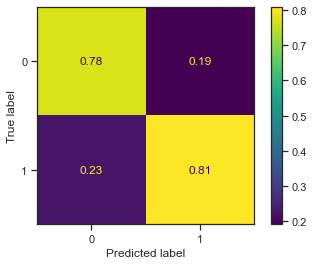

In [29]:
# display a plot  of the confusion matrix 
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions

# the normalise field allows the results to be shown as a ratio - of predicted / true or all values

cm= confusion_matrix(y_Test, y_pred, normalize='pred')

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Algorithm 2 - Naive Bayes (Gaussian)

This algorithms based on the mimplementation of the Baynes theorem.  There are a number of classifiers that can be used to explore this algorithm, including
- Bernoulli
- Categorial features
- Complement Classifer by Rennie et al
- Gaussian 
- Classifier for Mulinomial models
<br>


Gaussian model with be the classifier choosen for this project.  The Gaussian process follows a normal distribution i.e. it takes a bell shaped curve.  

### References:

1. Scikit-learn.org https://scikit-learn.org/stable/tutorial/index.html
2. Wikipedia.com / scikit-learn - https://en.wikipedia.org/wiki/Scikit-learn
3. MachineLearningMastery.com / Introductuin to scikit-learn - https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/
4. UCI Machine Learning Repository - https://archive.ics.uci.edu/ml/datasets/Heart+Disease, accessed 05 November 2021
5. Toward Data Science - https://towardsdatascience.com/heart-disease-prediction-73468d630cfc, accessed 05 November 2021
6. Scikit-learn.org / An Introduction to Machine Learning -  https://scikit-learn.org/stable/tutorial/basic/tutorial.html, accessed 09 November 2021
7. Scikit-learn.org / Classification - https://scikit-learn.org/stable/modules/sgd.html#classification, accessed 09 November 2021
8. IBM /Supervised vs. Unsupervised Learning: What’s the Difference? https://www.ibm.com/cloud/blog/supervised-vs-unsupervised-learning, access 09 November 2021
9. Pandas.pydata.org, Pandas.dataframe.corr, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html, accessed 20 December 2020
10. RealPython.com, NumPy, SciPy, and Pandas: Correlation With Python, https://realpython.com/numpy-scipy-pandas-correlation-python/, accessed 20 December 2020
11. Wikipedia.com, Pearson correlation coefficient , https://en.wikipedia.org/wiki/Pearson_correlation_coefficient, accessed 20 December 2020
12. Wikipedia.com, Spearman's rank correlation coefficient, https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient,accessed 20 December 2020
13. Wikipedia.com, Kendall rank correlation coefficient, ,accessed 20 December 2020
14. TowardsDataScience.com, Undertanding the Confusion Matrix from Scikit-learn, https://towardsdatascience.com/understanding-the-confusion-matrix-from-scikit-learn-c51d88929c79, accessed on 20 November 2021
15. Scikit-learn.org, sklearn.metrics.confusion_matrix, https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html, accessed 20 November 2021
16. Scikit-learn.org, Naive Bayes, https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes, accessed 21 November 2021
17. Scikit-learn.org, Gaussian Naive Bayes,https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB, accessed 21 November 2021
18. 
19. 
20. 



## End
